In [ ]:
#Ensure that multiple outputs can be displayed below a single cell 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
%%bash
## Begin by preparing the VM and the data used for the training
### Run this cell in the bash shell to explore the virtual machine and prepare the project structure
set -e

### Define useful vars for the project
#### Note that BASH Vars defined in a cell with the %%bash flag only persist within the cell's terminal
#USERDIR="/home/rechnercopf"
USERDIR="/Users/johnalanwillis/Documents/ilc-nodalMet-ML/ilc-nodalMet-ML/"
DATALOC="${USERDIR}""/datasets"
DATASET1="histopathologic-cancer-detection"

### explore the directory structure and setup data directories
pwd
ls "${DATALOC}"

if [[ -f "${DATALOC}" ]]
then mkdir "${DATALOC}"
fi

### review the contents of the project data storage bucket
gsutil ls gs://ilcproj-data

    


### copy datasets of interest to the VM instance if not already done

if [[ ! -f "${DATALOC}""/""${DATASET1}"".zip" ]]
then gsutil cp gs://ilcproj-data/histopathologic-cancer-detection.zip "${DATALOC}"
fi


### unzip the data to work with it

if [[ ! -f "${DATALOC}""/sample_submission.csv" ]] 
then unzip "${DATALOC}""/""${DATASET1}"".zip"
else
echo "${DATASET1}"" is unzipped and ready for use in ""${DATALOC}"
fi

In [25]:
## With the data unzipped in the appropriate location, begin exploring the datasets in python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

#review the contents of the unzipped kaggle dataset
!ls

ILCProj-Setup.ipynb   test                  train_labels.csv
sample_submission.csv train


In [ ]:
#review the sample and label data\

trainLabs=pd.read_csv("train_labels.csv")
trainLabs.head()

#define a simple function to summarize the amount of samples in each dataset and the percent of % cases
def charDataset(df, ident):
    "describes the size and % positivity for a dataframe"
    print("The", ident, "dataset contains", len(df), "samples, ",sum(df["label"])/len(df)*100, "percent of which are labeled as positive", sep = " ") 
    return

charDataset(trainLabs, "Training")
#trainLabs["label"].plot(kind="bar")

sampleSub=pd.read_csv("sample_submission.csv")
sampleSub.head()
charDataset(sampleSub, "Test")




In [2]:
!jupyter kernelspec list


Available kernels:
  python3    /Users/johnalanwillis/anaconda3/envs/ilcproj/share/jupyter/kernels/python3


NameError: name 'sys' is not defined

In [1]:
# quickly preview a few example images and grab a small subset for prototyping
import cv2

In [5]:
!conda list

zsh:1: command not found: conda


In [3]:
import sys 
print(sys.executable)

!jupyter kernelspec list
print(sys.path)

/Users/johnalanwillis/anaconda3/envs/ilcproj/bin/python
Available kernels:
  python3    /Users/johnalanwillis/anaconda3/envs/ilcproj/share/jupyter/kernels/python3
['/Users/johnalanwillis/Documents/ilc-nodalMet-ML/ilc-nodalMet-ML/code', '/Users/johnalanwillis/anaconda3/envs/ilcproj/lib/python37.zip', '/Users/johnalanwillis/anaconda3/envs/ilcproj/lib/python3.7', '/Users/johnalanwillis/anaconda3/envs/ilcproj/lib/python3.7/lib-dynload', '', '/Users/johnalanwillis/anaconda3/envs/ilcproj/lib/python3.7/site-packages', '/Users/johnalanwillis/anaconda3/envs/ilcproj/lib/python3.7/site-packages/IPython/extensions', '/Users/johnalanwillis/.ipython']


In [5]:
import skimage
import os

testFilesLoc="/Users/johnalanwillis/Documents/ilc-nodalMet-ML/ilc-nodalMet-ML/datasets/test"

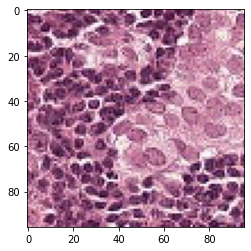

In [26]:
from skimage import io
testimageLoc=os.path.join(testFilesLoc, "00006537328c33e284c973d7b39d340809f7271b.tif")
testimage=io.imread(testimageLoc)
testimage.shape
plt.imshow(testimage)

In [ ]:
### Notice that the image file was read with the imread function of the skimage package
### the resulting file is in this case a 96x96x3 numpy array
### the value of any given element of the array corresponds to the intensity of the pixel at the matching (x,y) coordinates in the source image
### NOTE: There are several ways to encode images, most commonly using RGB, but HSV(Hue-saturation-V?) is also common

In [14]:
testimage.shape

(96, 96, 3)

In [ ]:
### Notice that the image file was read with the imread function of the skimage package
### the resulting file is in this case a 96x96x3 numpy array
### the value of any given element of the array corresponds to the intensity of the pixel at the matching (x,y) coordinates in the source image
### NOTE: There are several ways to encode images, most commonly using RGB, but HSV(Hue-saturation-V?) is also common
### Just as an image can be converted to a numpy array, the converse can also occur

array([[0.02989677, 0.55953612, 0.16258315, ..., 0.23416659, 0.93433609,
        0.14225707],
       [0.89377962, 0.28516832, 0.36394378, ..., 0.47611757, 0.00831904,
        0.59436088],
       [0.75900318, 0.32886801, 0.22654021, ..., 0.60116586, 0.32444597,
        0.7931227 ],
       ...,
       [0.45284729, 0.163884  , 0.26383132, ..., 0.62103658, 0.54244001,
        0.35951671],
       [0.28737926, 0.06879669, 0.31357651, ..., 0.16193964, 0.27697581,
        0.23439507],
       [0.68838859, 0.32594923, 0.42991846, ..., 0.2601946 , 0.98033577,
        0.71840645]])

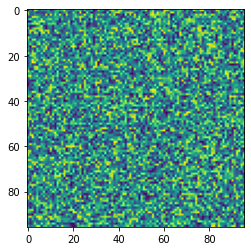

In [29]:
import numpy as np

im_rand = np.random.random([96,96])

plt.imshow(im_rand)
im_rand.view()